# Heart Disease Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

# Exploratory Data Analysis (EDA)

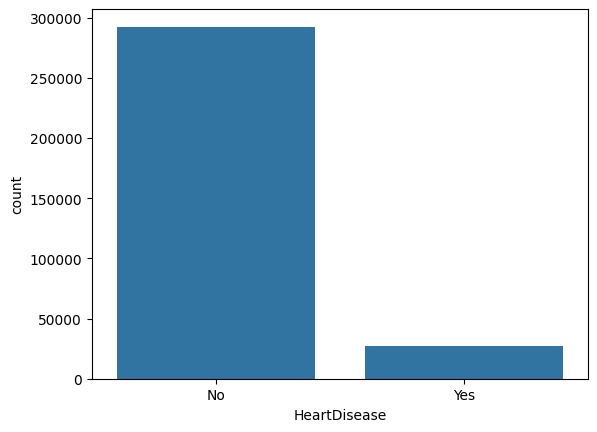

In [ ]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [ ]:
print("Ratio of count of class 'No' to class 'Yes':", len(df[df['HeartDisease']=='No'])/len(df[df['HeartDisease']=='Yes']))

Ratio of count of class 'No' to class 'Yes': 10.682862674898622


Clearly the target variable, *HeartDisease*, has extremely unbalanced class frequencies. This suggests the need to employ balancing techniques before we make our model.

In [ ]:
continuous_vars=df.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


## Exploring continuous variables

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


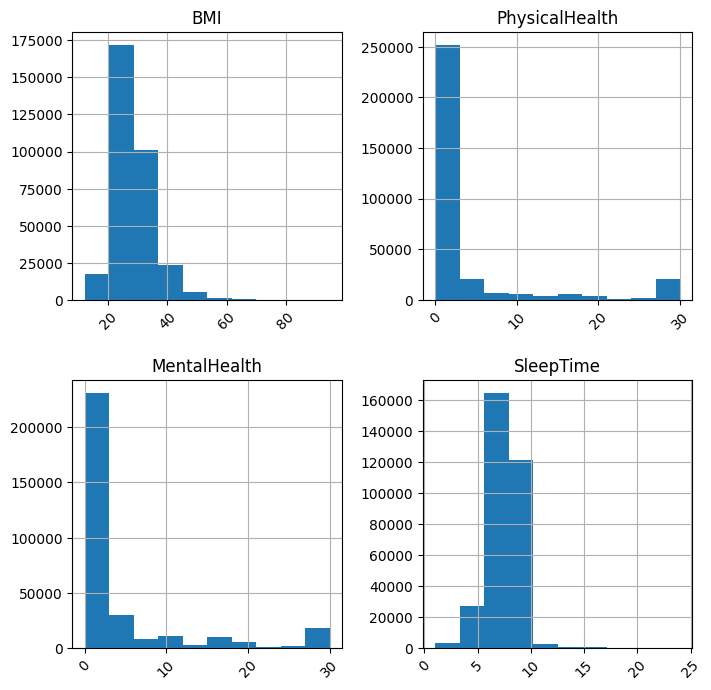

In [ ]:
df.hist(figsize=(8,8), xrot=45)
plt.show()

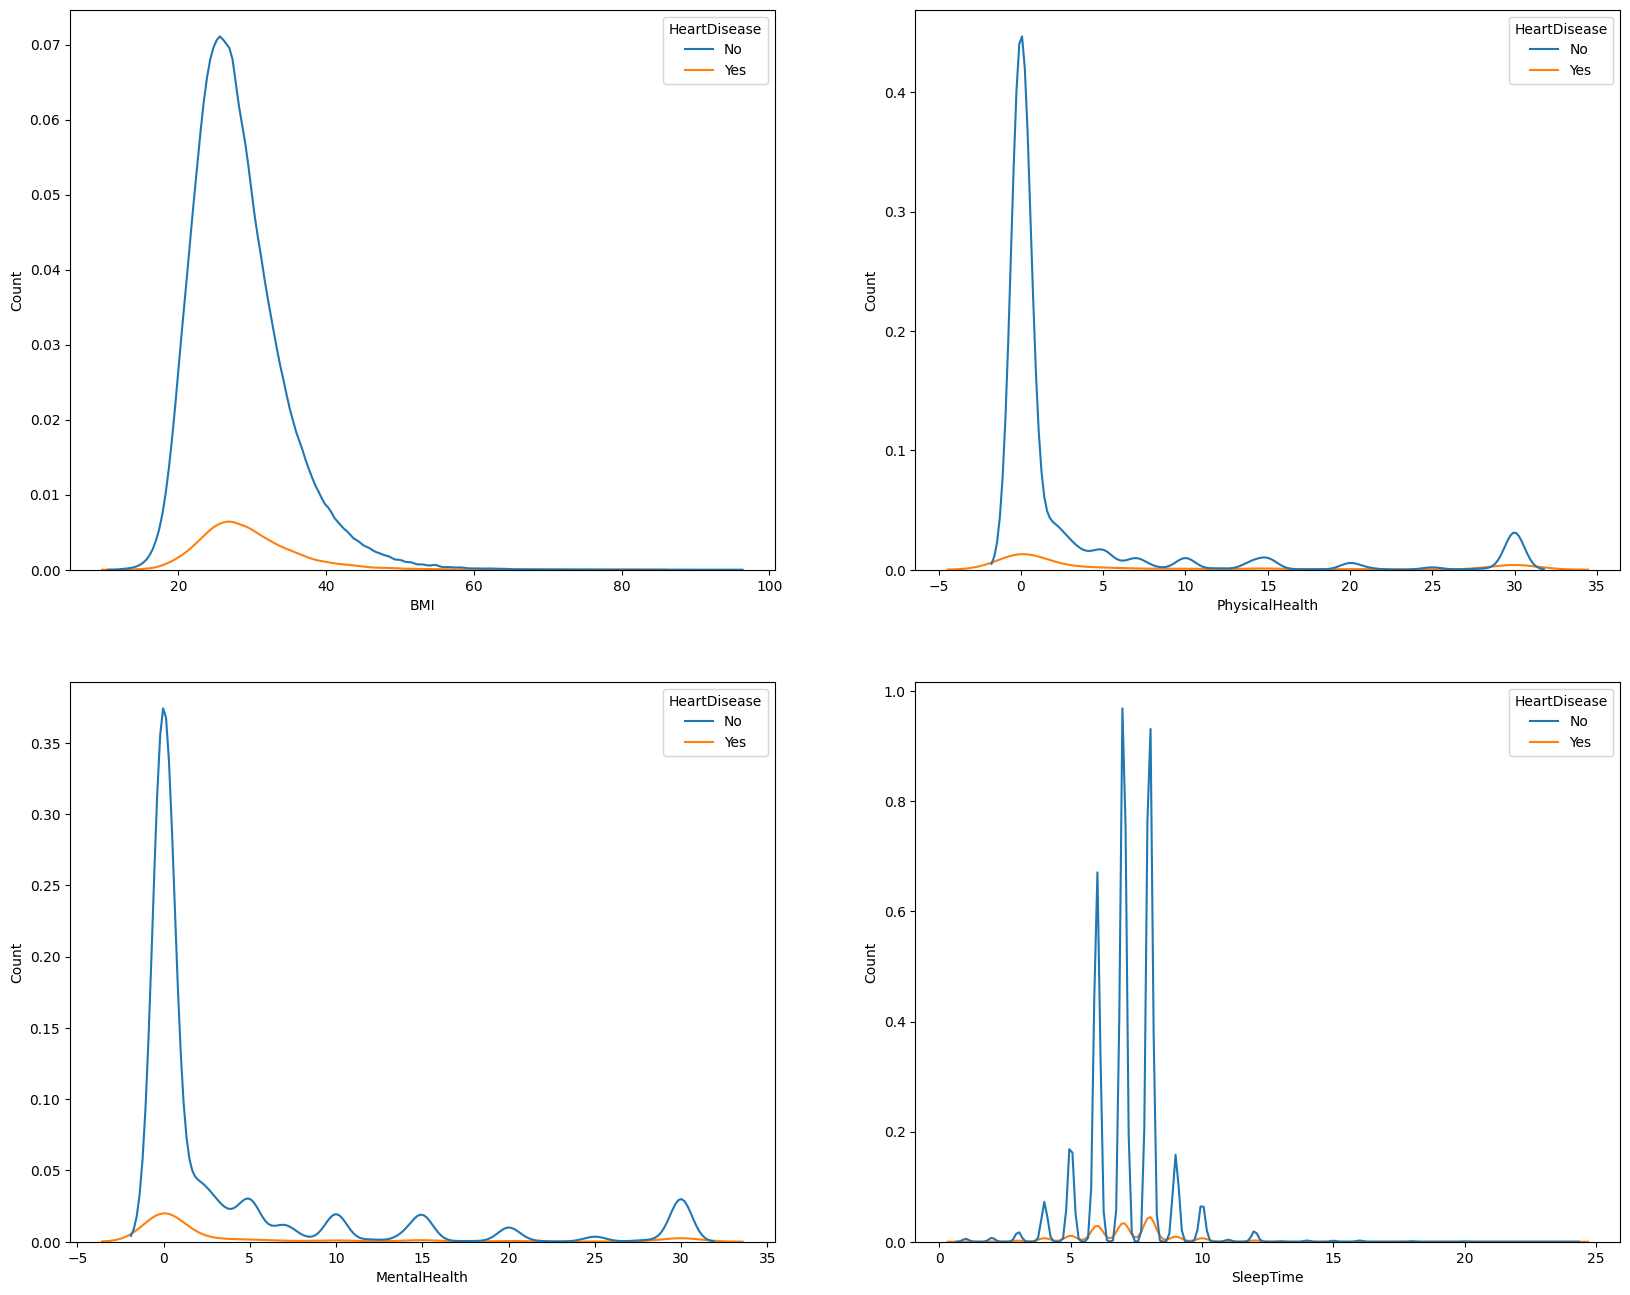

In [ ]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.kdeplot(x=col,hue='HeartDisease',data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

*BMI* and *SleepTime* have close to a normal distribution whereas the same can not be seen in *PhysicalHealth* and *MentalHealth*

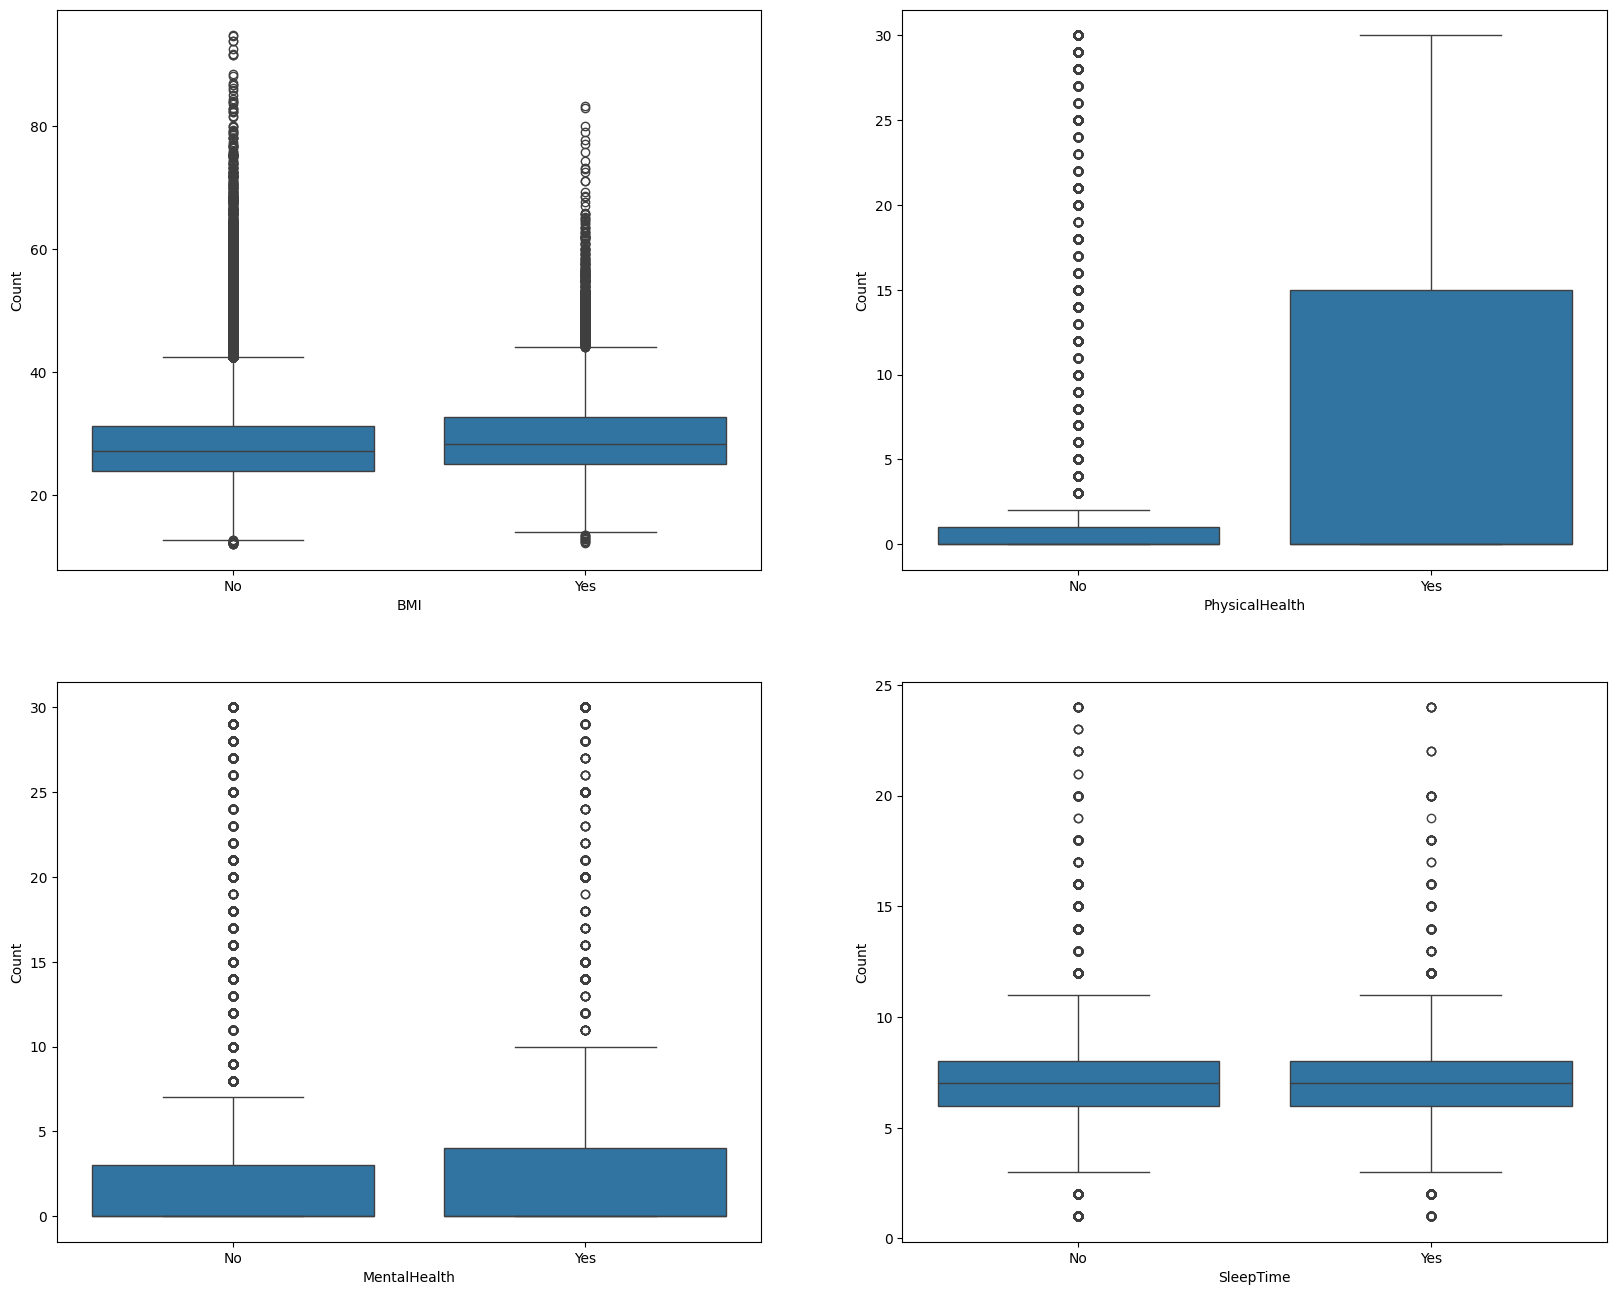

In [ ]:
i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y=col, x='HeartDisease', data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

Continuous data has presence of outliers, must be dealt with in preprocessing

## Exploring categorical variables

In [ ]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


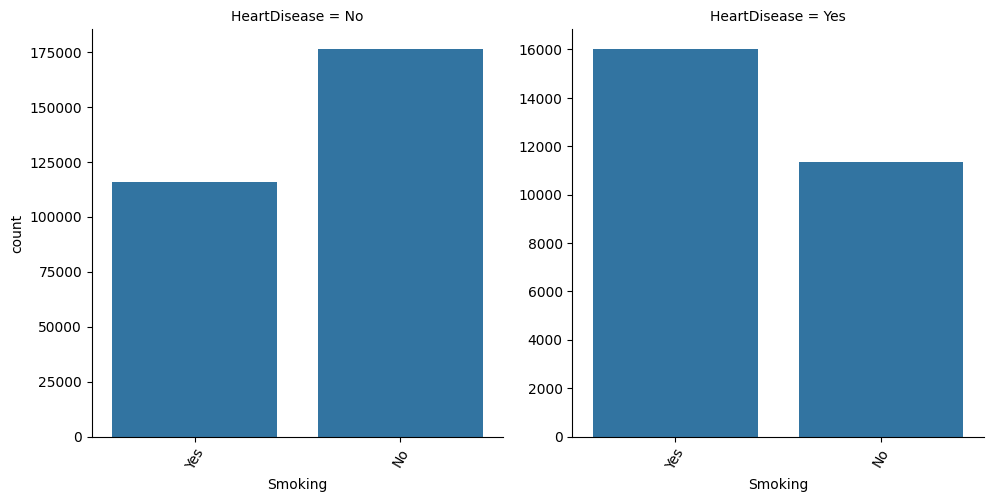

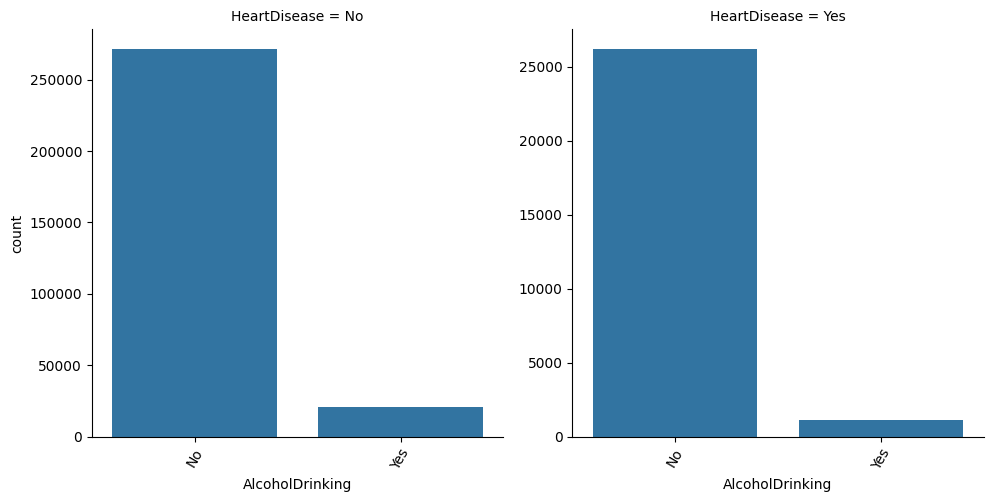

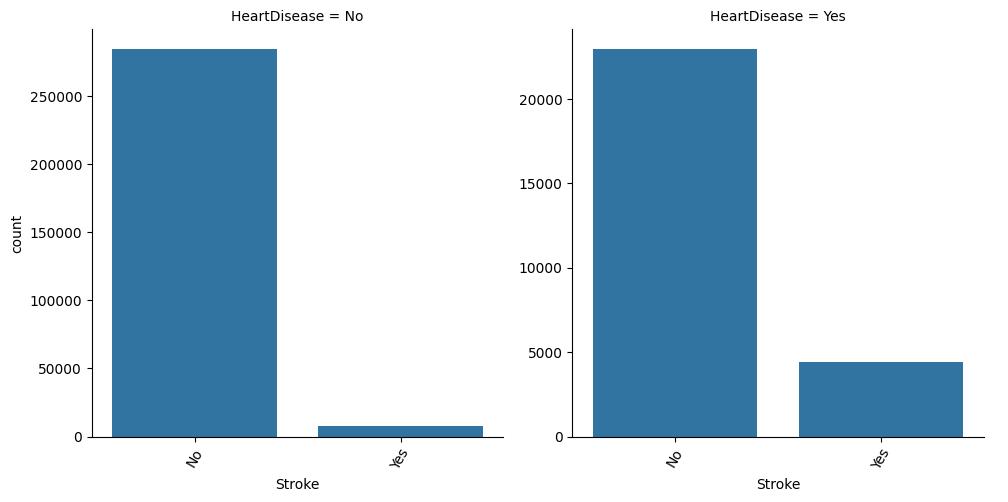

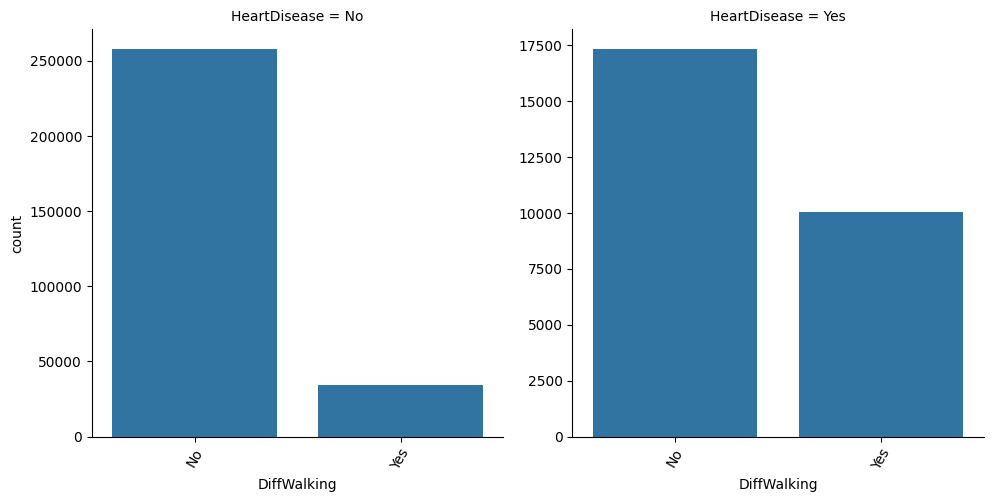

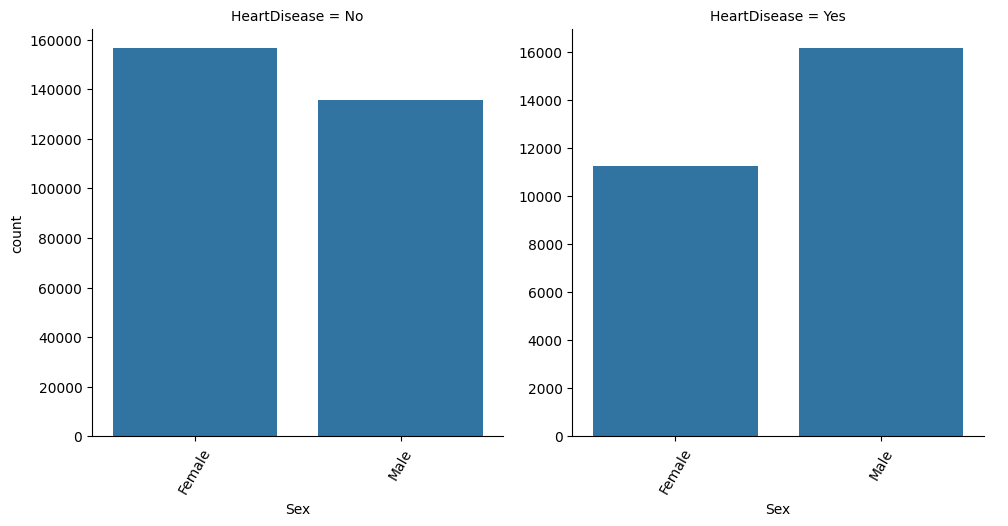

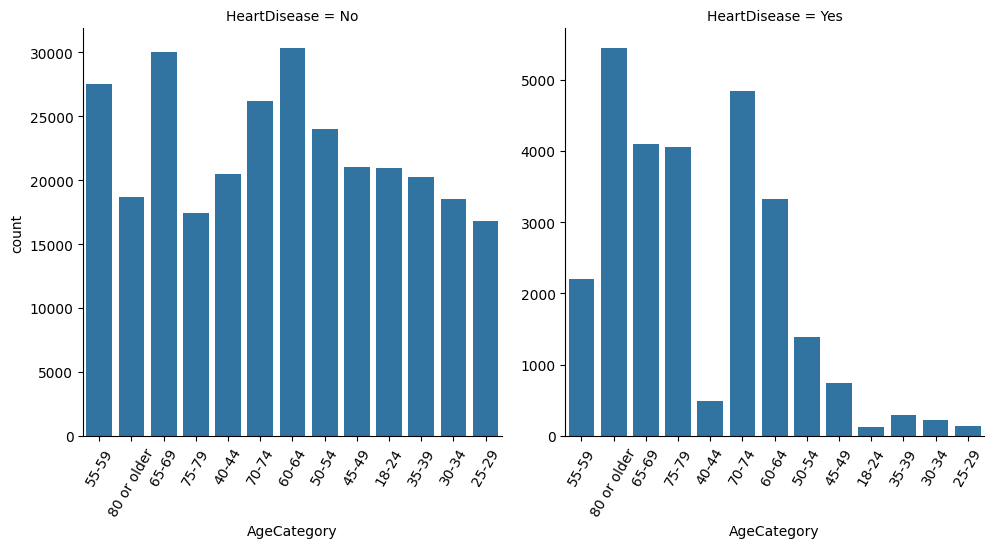

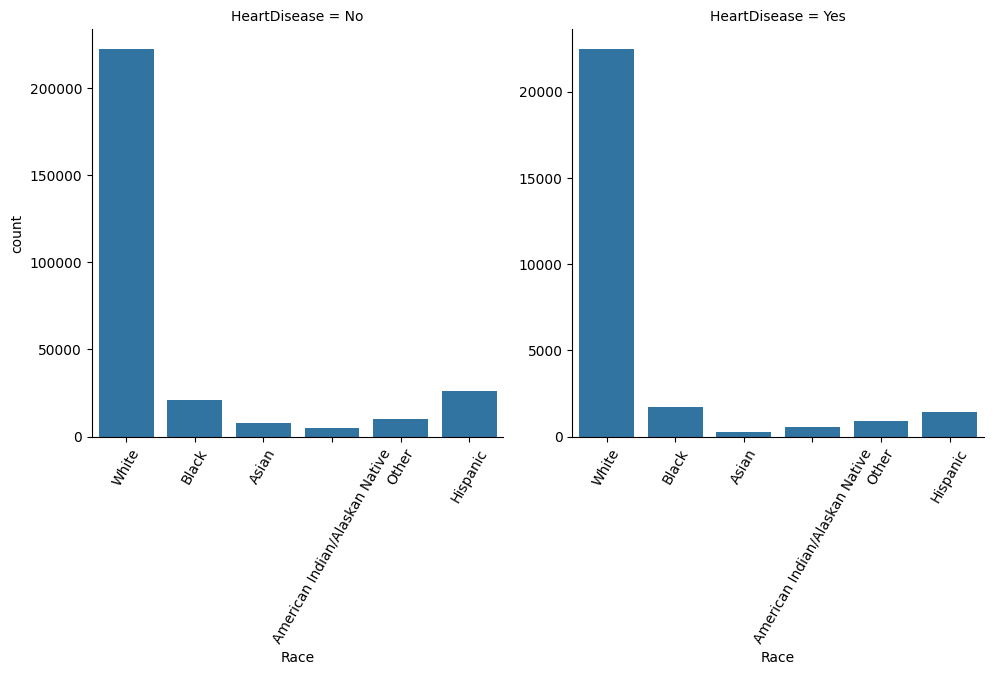

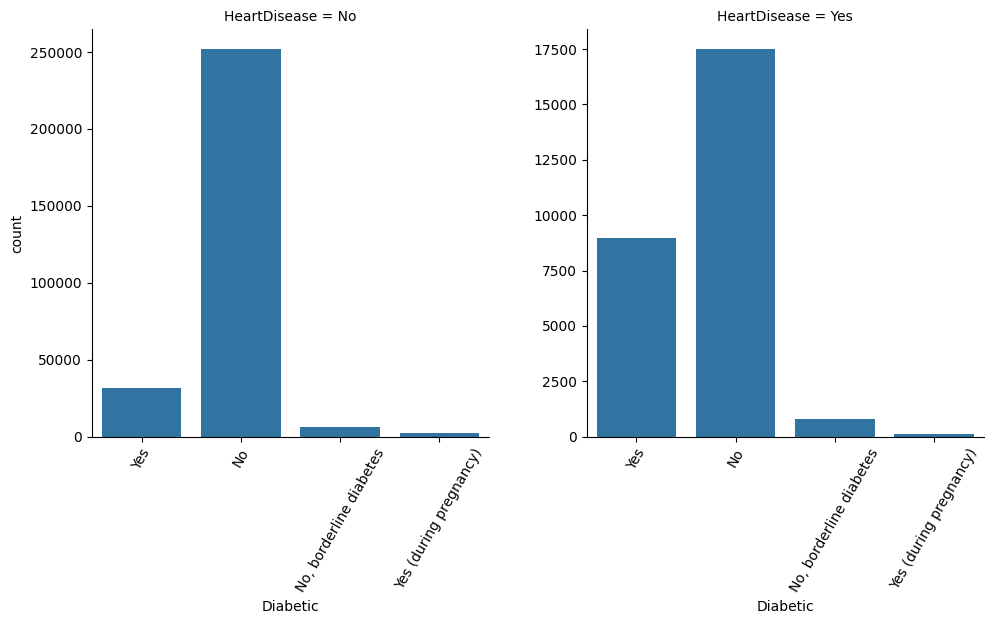

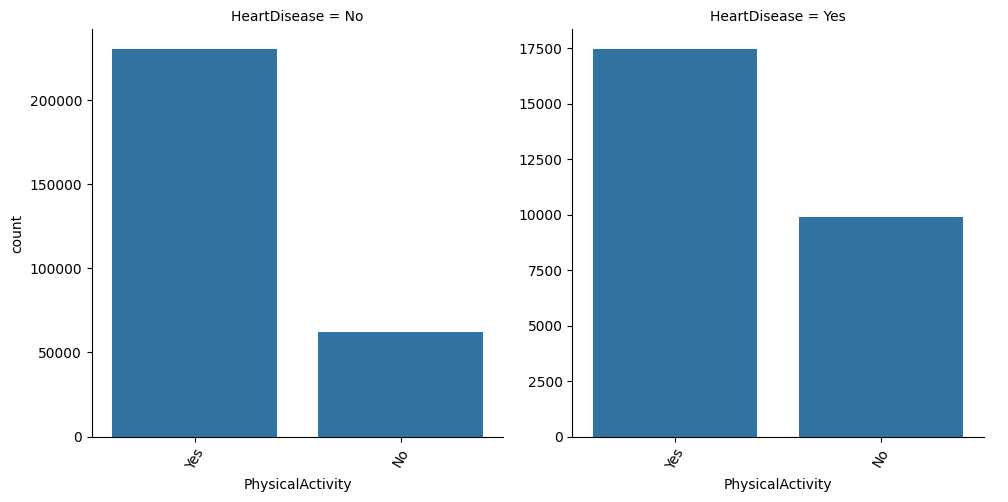

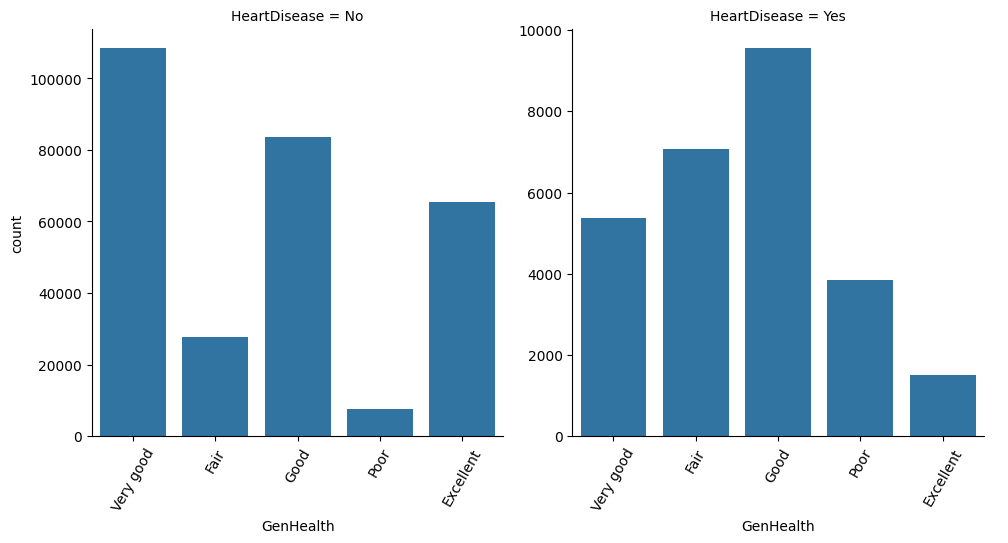

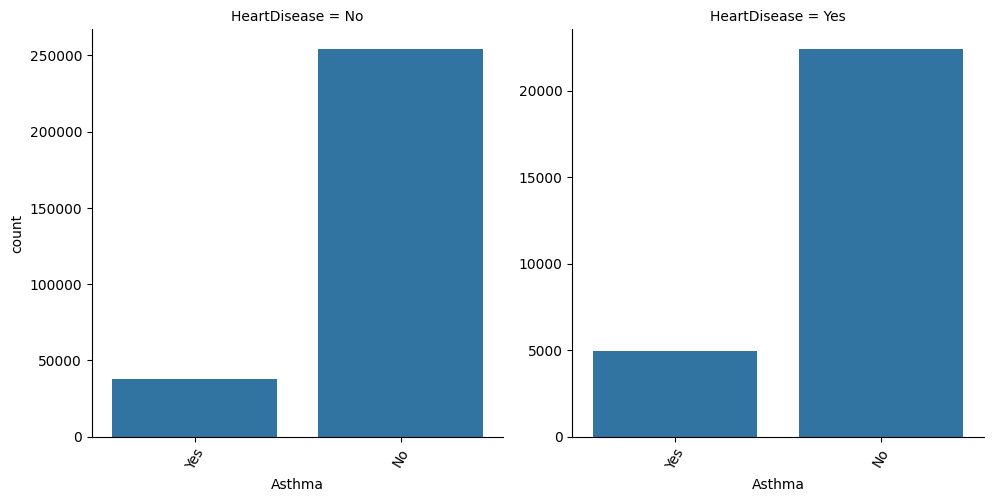

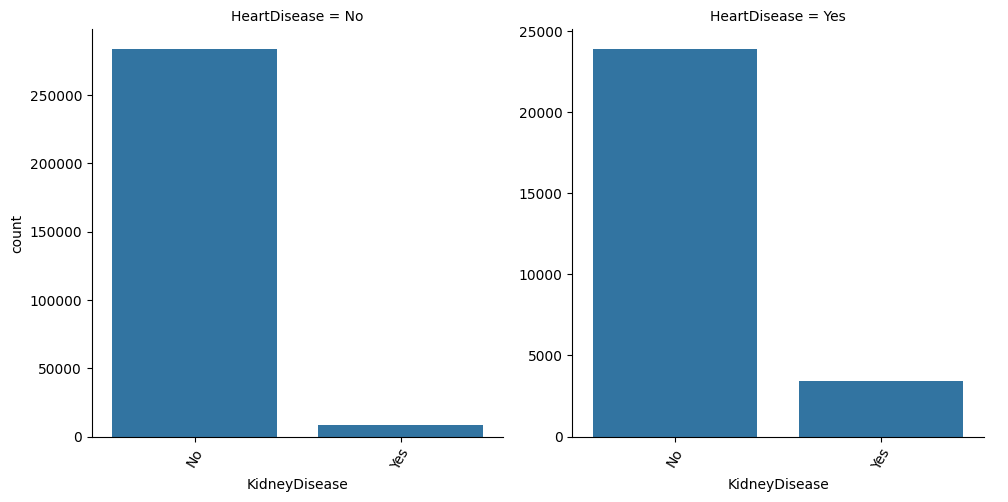

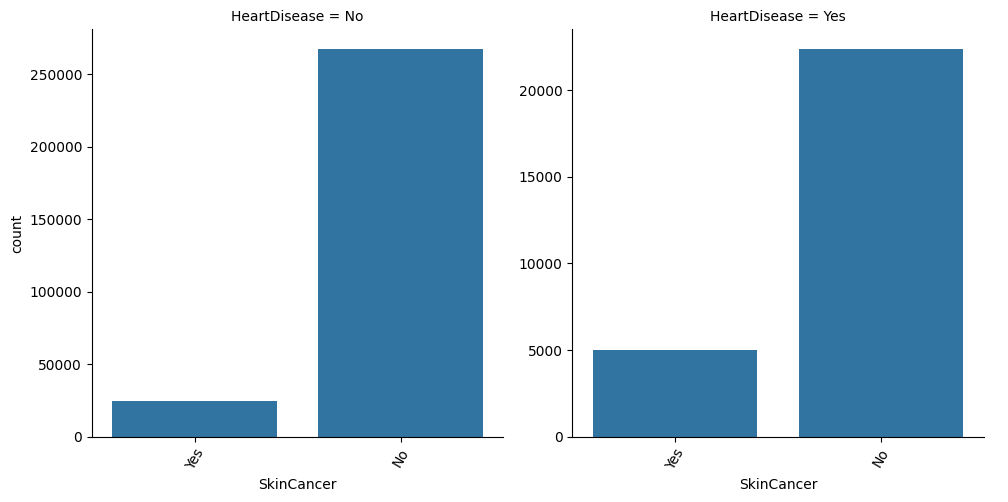

In [ ]:
for col in categorical_vars[1:]:
    g = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

* **Smoking**: We can see that the composition of the subset of population with HeartDisease has a higher proportion of smokers.
* Alcohol Drinking: The distribution of Yes/No is almost the same in both sets with and without HeartDisease.
* **Stroke**: It is clear that the population with HeartDisease has a higher proportion of people who have had a stroke, which suggests a correlation between the two.
* **DiffWalking**: There are a higher number of people who have Difficulty Walking with HeartDisease as opposed to those who do not.
* **Sex**: It appears that Males make up a higher proportion of the population with HeartDisease
* **AgeCategory**: We see that the occurences of HeartDisease are more common in older age groups
* Race: The distribution of Race with respect to HeartDisease is nearly the same, suggesting weak correlation
* **Diabetic**: There is a higher proportion of diabetics in subset of people with HeartDisease
* **PhysicalActivity**: There are more physically inactive people with HeartDisease as compared to physically active people
* **GenHealth**: People without HeartDisease have better General Health than those with HeartDisease
* Asthma: The distribution for with/without HeartDisease is almost the same, suggesting weak correlation
* **KidneyDisease**: There is a bigger fraction of people with KidneyDisease and HealthDisease as compared to those without HeartDisease
* **SkinCancer**: There is a bigger fraction of people with SkinCancer and HealthDisease as compared to those without HeartDisease

# Data Preprocessing

## 1. Missing Value Analysis

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


No missing values found

## 2. Duplicates

In [ ]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (319795, 18)
Duplicates in dataset: 18078


Duplicates found, we will drop these rows

In [ ]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (301717, 18)
Duplicates in dataset: 0


## 3. Outlier Analysis

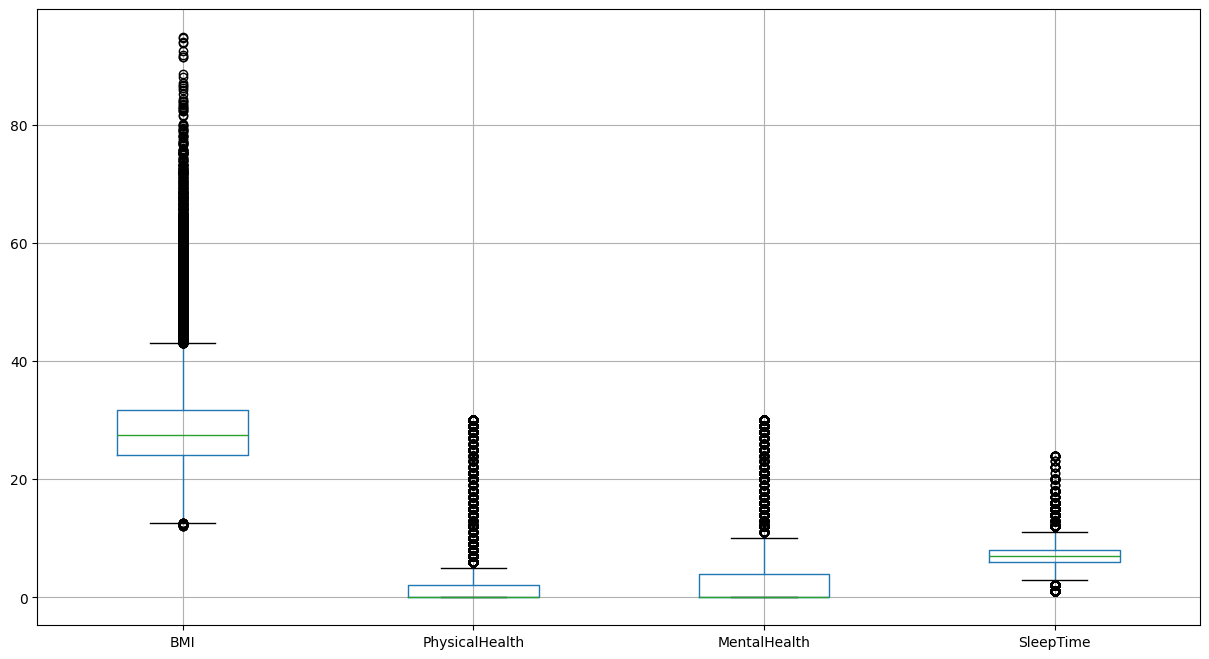

In [ ]:
plt.figure(figsize=(15,8))
df.boxplot(column=list(continuous_vars))
plt.show()

In [ ]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [ ]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)

    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)

    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100

    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: BMI
Upper Limit = 43.08
Lower Limit = 12.600000000000005
Percentage of Outliers= 2.9514412512387436
-------------------------------------------------- 

--------------------------------------------------
Column: PhysicalHealth
Upper Limit = 5.0
Lower Limit = -3.0
Percentage of Outliers= 15.622586728623181
-------------------------------------------------- 

--------------------------------------------------
Column: MentalHealth
Upper Limit = 10.0
Lower Limit = -6.0
Percentage of Outliers= 13.162334240364315
-------------------------------------------------- 

--------------------------------------------------
Column: SleepTime
Upper Limit = 11.0
Lower Limit = 3.0
Percentage of Outliers= 1.5053841845172795
-------------------------------------------------- 



* For BMI and SleepTime, % of outliers is very low => can delete those records
* For PhysicalHeath and MentalHealth, % of outliers is too great to delete records

In [ ]:
df.select_dtypes(include='float64').skew()

,0
BMI,1.297737
PhysicalHealth,2.501000
MentalHealth,2.237470
SleepTime,0.697224


PhysicalHealth and MentalHealth are greately positively skewed => can apply log transformation

In [ ]:
#dropping records for BMI and SleepTime outliers
for col in ['BMI', 'SleepTime']:
    UL,LL = outlier_lims(df[col])
    df.loc[df[col]<LL,col]=np.nan
    df.loc[df[col]>UL,col]=np.nan

df.dropna(subset=['BMI', 'SleepTime'], inplace=True)
df.reset_index(drop=True, inplace=True)

#using log transformation for PhysicalHealth and MentalHealth
df[['PhysicalHealth','MentalHealth']] = np.log1p(df[['PhysicalHealth','MentalHealth']])

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1.386294,3.433987,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,3.044522,3.433987,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,3.367296,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,No,23.38,No,No,No,0.000000,0.000000,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
288492,No,22.22,No,No,No,0.000000,0.000000,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
288493,Yes,27.41,Yes,No,No,2.079442,0.000000,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
288494,No,29.84,Yes,No,No,0.000000,0.000000,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


## 4. Feature Selection

### 4.1 Continuous Features

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.075499      0.015184  -0.055475
PhysicalHealth  0.075499        1.000000      0.266002  -0.098170
MentalHealth    0.015184        0.266002      1.000000  -0.148908
SleepTime      -0.055475       -0.098170     -0.148908   1.000000


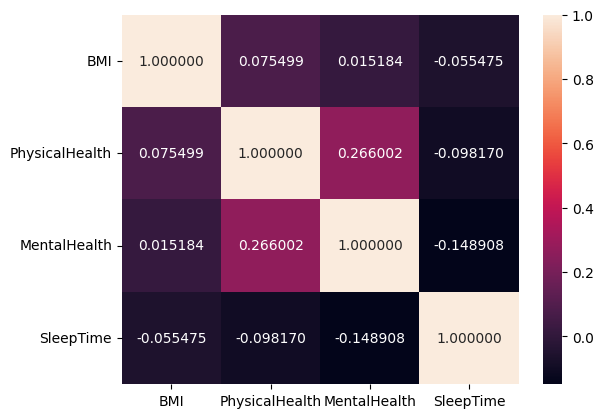

In [ ]:
df_corr=df.select_dtypes(include='float64').corr()
print(df_corr)
sns.heatmap(df_corr, annot=True, fmt="f")
plt.show()

This shows that PhysicalHealth and MentalHealth are related. However, none of these values are high enough to drop a feature altogether.

### 4.2 Categorical Features

In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_vars[1:]:
    data_crosstab = pd.crosstab(df['HeartDisease'], df[col],)
    print(data_crosstab,"\n")
    c, p, dof, expected = chi2_contingency(data_crosstab)
    if p<.05:
        result="There is a significant association between these varibles "
    else:
        result="There is no association those varibles"
    print('--> P-value is',p,"\n-->",result,"\n")

Smoking           No     Yes
HeartDisease                
No            156499  106469
Yes            10565   14963 

--> P-value is 0.0 
--> There is a significant association between these varibles  

AlcoholDrinking      No    Yes
HeartDisease                  
No               243074  19894
Yes               24466   1062 

--> P-value is 5.510264590614578e-89 
--> There is a significant association between these varibles  

Stroke            No   Yes
HeartDisease              
No            255768  7200
Yes            21523  4005 

--> P-value is 0.0 
--> There is a significant association between these varibles  

DiffWalking       No    Yes
HeartDisease               
No            232543  30425
Yes            16650   8878 

--> P-value is 0.0 
--> There is a significant association between these varibles  

Sex           Female    Male
HeartDisease                
No            141278  121690
Yes            10319   15209 

--> P-value is 0.0 
--> There is a significant associati

All the features have significant assoication with the target variable (HeartDisease), hence can not be dropped

## 5. Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,1.386294,3.433987,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.000000,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,3.044522,3.433987,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.000000,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,3.367296,0.000000,1,0,4,5,0,1,4,8.0,0,0,0


## 5. Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.084999,1,0,0,0.707383,2.325916,0,0,7,5,2,1,4,-1.636283,1,0,1
1,0,-1.389973,0,0,1,-0.571605,-0.678373,0,0,12,5,0,1,4,-0.041730,0,0,0
2,0,-0.230359,1,0,0,2.237255,2.325916,0,1,9,5,2,1,1,0.755547,1,0,0
3,0,-0.670789,0,0,0,-0.571605,-0.678373,0,0,11,5,0,0,2,-0.839007,0,0,1
4,0,-0.763707,0,0,0,2.535044,-0.678373,1,0,4,5,0,1,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,-0.825033,0,0,0,-0.571605,-0.678373,0,0,8,3,0,1,0,-0.839007,0,0,0
288492,0,-1.040602,0,0,0,-0.571605,-0.678373,0,0,0,3,0,1,0,0.755547,0,0,0
288493,1,-0.076115,1,0,0,1.346876,-0.678373,1,1,8,3,2,0,1,-0.839007,1,0,0
288494,0,0.375465,1,0,0,-0.571605,-0.678373,0,1,3,3,0,1,4,-1.636283,1,0,0


## 6. Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [ ]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.282189,1,0,0,0.707383,-0.678373,0,1,7,0,0,1,4,-0.839007,1,0,0
1,0,-0.070540,0,0,0,-0.571605,-0.678373,0,0,10,5,1,0,0,-0.041730,0,0,0
2,0,-1.302630,0,0,0,0.707383,0.534453,0,1,0,3,0,1,0,-0.839007,1,0,0
3,0,-0.353010,0,0,0,-0.571605,-0.678373,0,0,12,5,0,0,2,0.755547,0,0,1
4,0,0.379182,1,0,0,-0.571605,-0.678373,0,1,11,5,0,1,0,-0.041730,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230791,0,-1.036886,1,0,1,0.067889,2.325916,0,1,9,4,0,1,4,-3.230837,0,0,0
230792,0,-1.982789,1,0,0,0.441969,-0.678373,0,1,8,5,0,0,4,-0.041730,0,0,0
230793,1,-0.637339,1,0,0,-0.571605,-0.678373,0,1,12,5,0,1,0,-0.041730,0,0,0
230794,1,1.128100,0,0,0,0.707383,-0.678373,0,1,8,5,0,1,4,-0.041730,0,0,0


In [ ]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.893792,0,0,0,-0.571605,-0.678373,0,1,10,5,0,1,4,0.755547,0,0,1
1,1,-0.083549,1,0,0,-0.571605,-0.678373,0,0,9,5,0,1,2,0.755547,0,0,0
2,0,-0.416194,0,0,0,-0.571605,1.747279,0,0,5,2,0,1,4,-0.839007,1,0,0
3,0,0.150604,1,0,0,-0.571605,1.747279,0,1,2,4,0,1,4,-0.839007,0,0,0
4,0,-1.250597,0,0,0,-0.571605,-0.678373,0,1,12,5,0,1,2,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57695,0,0.122729,0,0,0,0.067889,-0.678373,0,1,1,5,0,1,0,0.755547,0,0,0
57696,0,0.914389,1,1,0,-0.571605,-0.678373,0,0,9,5,0,1,0,0.755547,0,0,0
57697,0,1.724632,0,0,0,-0.571605,-0.678373,0,1,4,5,0,1,0,0.755547,0,0,0
57698,0,0.947839,0,0,1,-0.571605,-0.678373,0,0,10,5,2,1,2,-0.041730,0,0,0


## 7. Class Balancing

In [ ]:
# class count
class_count_0, class_count_1 = training_data['HeartDisease'].value_counts()

# Separate class
class_0 = training_data[training_data['HeartDisease'] == 0]
class_1 = training_data[training_data['HeartDisease'] == 1]

print('Class 0 [HeartDisease = No]:', class_0.shape)
print('Class 1 [HeartDisease = Yes]:', class_1.shape)

Class 0 [HeartDisease = No]: (210291, 18)
Class 1 [HeartDisease = Yes]: (20505, 18)


**Following are some of the methods to balance the data:**
* Random under-sampling
* Random over-sampling

* Synthetic Minority Over-sampling Technique (SMOTE)
* NearMiss

In [ ]:
x = training_data.drop(['HeartDisease'], axis=1)
y = training_data['HeartDisease']

### 7.1 Random Under-sampling

Total counts of class 1 and 0:
HeartDisease
0    20505
1    20505
Name: count, dtype: int64


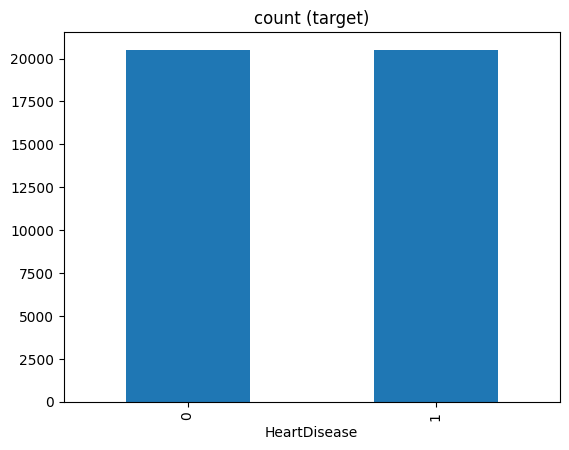

In [ ]:
# taking sample from class_0 such that both have the quantity of minority class, i.e. class_1
class_0_under = class_0.sample(class_count_1)

training_data_1= pd.concat([class_0_under, class_1], axis=0)

# plot the count after under-sampling
print("Total counts of class 1 and 0:")
print(training_data_1['HeartDisease'].value_counts())
training_data_1['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

### 7.2 Random Over-sampling

Total counts of class 1 and 0:
HeartDisease
1    210291
0    210291
Name: count, dtype: int64


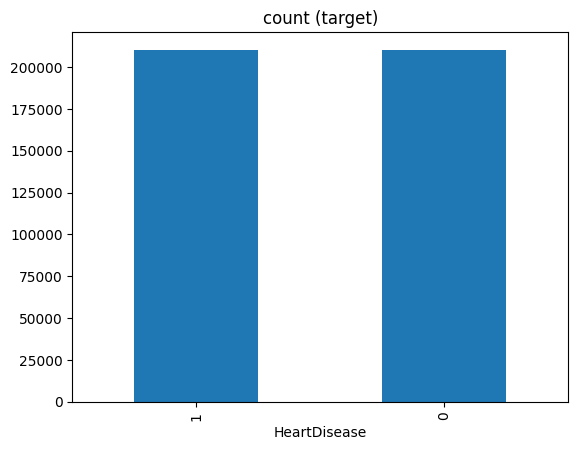

In [ ]:
# taking sample from class_1 such that both have the quantity of majority class, i.e. class_0
class_1_over = class_1.sample(class_count_0, replace=True)

training_data_2 = pd.concat([class_1_over, class_0], axis=0)

# plot the count after over-sampling
print("Total counts of class 1 and 0:")
print(training_data_2['HeartDisease'].value_counts())
training_data_2['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

### 7.3 Under-sampling with Tomek links

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

### 7.4 SMOTE (Synthetic Minority Over-sampling Technique)


This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

training_data_4 = pd.concat([y_smote, x_smote], axis=1)

Original dataset shape Counter({0: 210291, 1: 20505})
Resample dataset shape Counter({0: 210291, 1: 210291})


### 7.5 NearMiss


NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

# fit predictor and target variable
x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

training_data_5 = pd.concat([y_nm, x_nm], axis=1)

Original dataset shape: Counter({0: 210291, 1: 20505})
Resample dataset shape: Counter({0: 20505, 1: 20505})


# Model Development


* **Logistic Regression**
* **Decision Tree**
* **Random Forest**


In [ ]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train = training_data.drop(['HeartDisease'], axis=1)
y_train = training_data['HeartDisease']

X_train1 = training_data_1.drop(['HeartDisease'], axis=1)
y_train1 = training_data_1['HeartDisease']

X_train2 = training_data_2.drop(['HeartDisease'], axis=1)
y_train2 = training_data_2['HeartDisease']

X_train4 = training_data_4.drop(['HeartDisease'], axis=1)
y_train4 = training_data_4['HeartDisease']

X_train5 = training_data_5.drop(['HeartDisease'], axis=1)
y_train5 = training_data_5['HeartDisease']

X_train_list = [X_train, X_train1, X_train2 ,X_train4, X_train5]
y_train_list = [y_train, y_train1, y_train2, y_train4, y_train5]
data_desc = ['Imbalanced', 'Random Under-sampling', 'Random Over-sampling', 'SMOTE', 'NearMiss']

## Logistic Regression

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.9131
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     52677
           1       0.50      0.08      0.14      5023

    accuracy                           0.91     57700
   macro avg       0.71      0.54      0.55     57700
weighted avg       0.88      0.91      0.88     57700

Confusion Matrix:


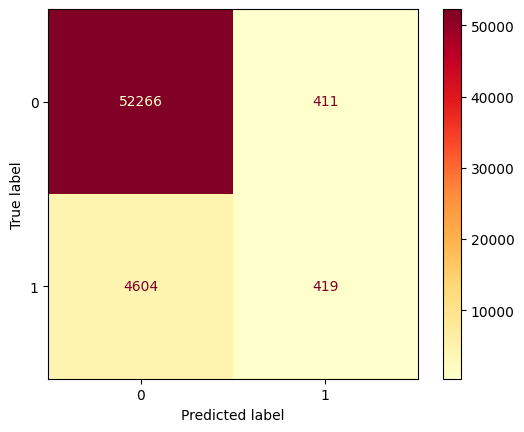

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7328
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52677
           1       0.21      0.77      0.33      5023

    accuracy                           0.73     57700
   macro avg       0.59      0.75      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


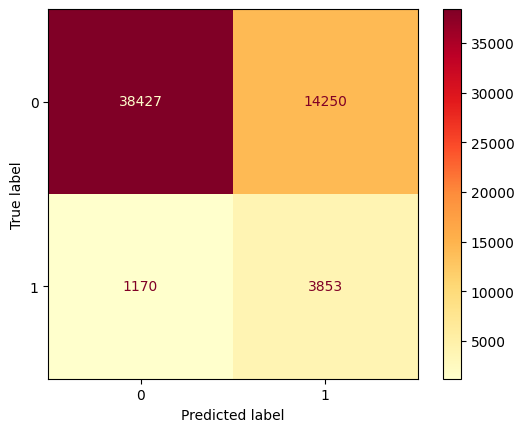

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.7324
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52677
           1       0.21      0.77      0.33      5023

    accuracy                           0.73     57700
   macro avg       0.59      0.75      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


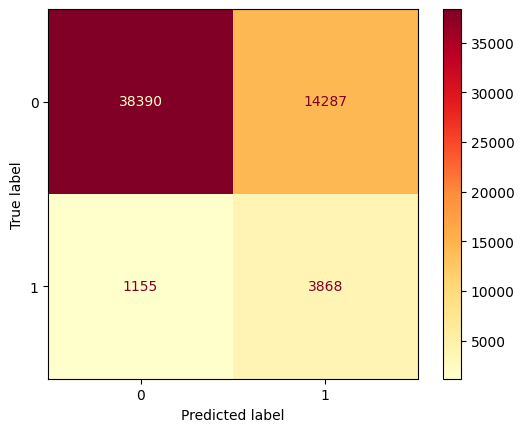

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (SMOTE):

Model accuracy score: 0.7002
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     52677
           1       0.19      0.77      0.31      5023

    accuracy                           0.70     57700
   macro avg       0.58      0.73      0.56     57700
weighted avg       0.90      0.70      0.77     57700

Confusion Matrix:


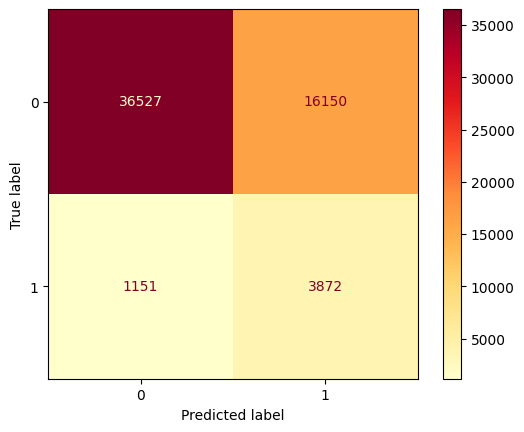

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (NEARMISS):



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy score: 0.3649
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.32      0.48     52677
           1       0.10      0.79      0.18      5023

    accuracy                           0.36     57700
   macro avg       0.52      0.56      0.33     57700
weighted avg       0.87      0.36      0.46     57700

Confusion Matrix:


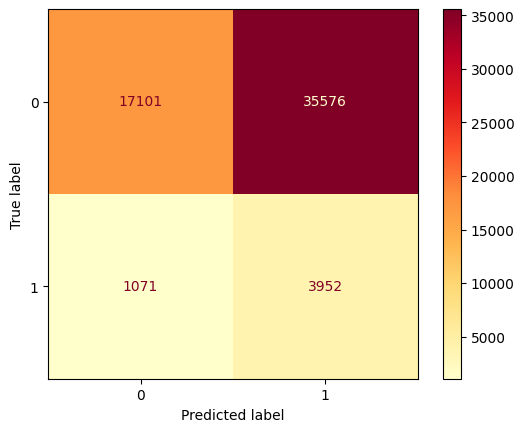

---------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())

    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)

    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))

    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")

Best result is with Random under/over-sampling which give recall=0.78 and accuracy=73%

## Decision Tree

---------------------------------------------------------------------------
Model with training data-0 (Imbalanced):

Model accuracy score: 0.9129
Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52677
           1       0.00      0.00      0.00      5023

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


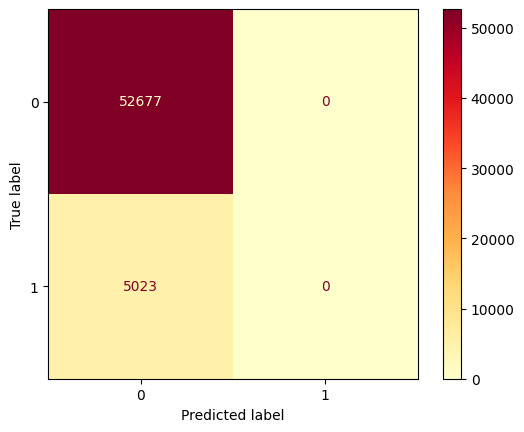

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Random Under-sampling):

Model accuracy score: 0.7330
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     52677
           1       0.20      0.70      0.31      5023

    accuracy                           0.73     57700
   macro avg       0.58      0.72      0.57     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


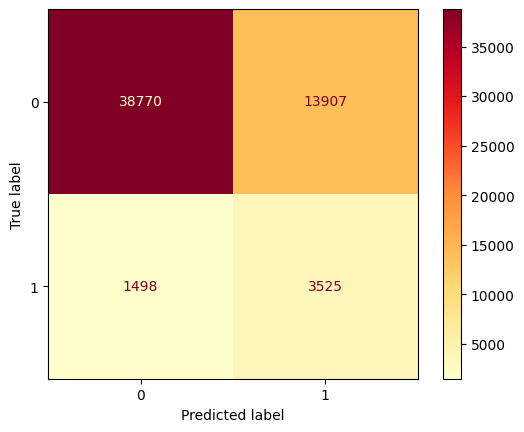

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Random Over-sampling):

Model accuracy score: 0.7330
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     52677
           1       0.20      0.70      0.31      5023

    accuracy                           0.73     57700
   macro avg       0.58      0.72      0.57     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


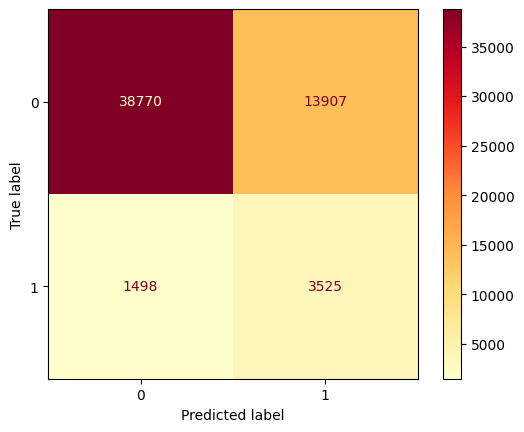

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (SMOTE):

Model accuracy score: 0.7246
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     52677
           1       0.20      0.71      0.31      5023

    accuracy                           0.72     57700
   macro avg       0.58      0.72      0.57     57700
weighted avg       0.90      0.72      0.78     57700

Confusion Matrix:


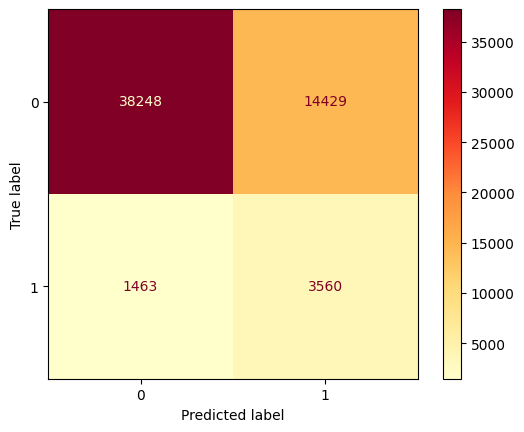

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-4 (NearMiss):

Model accuracy score: 0.4828
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.46      0.62     52677
           1       0.11      0.68      0.19      5023

    accuracy                           0.48     57700
   macro avg       0.52      0.57      0.40     57700
weighted avg       0.87      0.48      0.58     57700

Confusion Matrix:


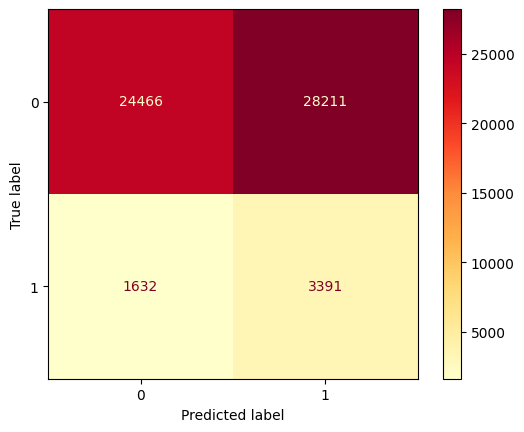

---------------------------------------------------------------------------


In [ ]:
from sklearn.tree import DecisionTreeClassifier


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")

    clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
    clf_dtc.fit(X_train_list[i], y_train_list[i])

    pred = clf_dtc.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))

    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")

Best result is with Random Over-sampling & SMOTE which give recall=0.71 and accuracy=72%

## Random Forest

---------------------------------------------------------------------------
Model with training data-0 (Imbalanced):

Model accuracy score: 0.9021
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     52677
           1       0.32      0.11      0.16      5023

    accuracy                           0.90     57700
   macro avg       0.62      0.54      0.56     57700
weighted avg       0.87      0.90      0.88     57700

Confusion Matrix:


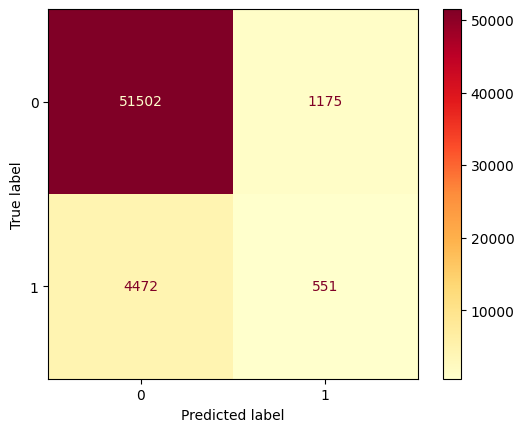

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-1 (Random Under-sampling):

Model accuracy score: 0.7148
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     52677
           1       0.20      0.77      0.32      5023

    accuracy                           0.71     57700
   macro avg       0.59      0.74      0.57     57700
weighted avg       0.90      0.71      0.78     57700

Confusion Matrix:


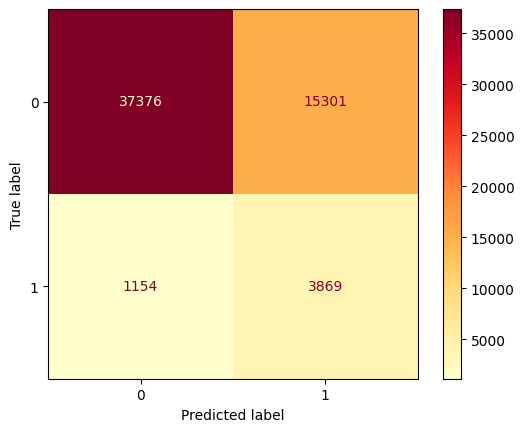

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-2 (Random Over-sampling):

Model accuracy score: 0.8874
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     52677
           1       0.29      0.20      0.24      5023

    accuracy                           0.89     57700
   macro avg       0.61      0.58      0.59     57700
weighted avg       0.87      0.89      0.88     57700

Confusion Matrix:


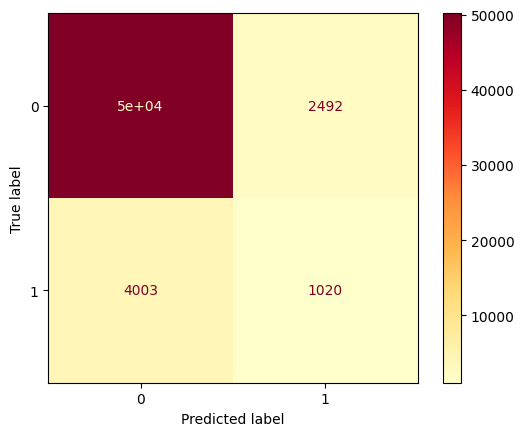

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Model with training data-3 (SMOTE):



KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import  RandomForestClassifier


for i in range(3):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data-{i} ({data_desc[i]}):\n")

    clf_RF= RandomForestClassifier().fit(X_train_list[i], y_train_list[i])

    pred = clf_RF.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))

    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")
